In [4]:
import cv2

reading img using cv2

In [6]:
import cv2

img = cv2.imread("CameraMan.jpg")   
cv2.imshow("Original Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

reading img using matplt (bc notebook)

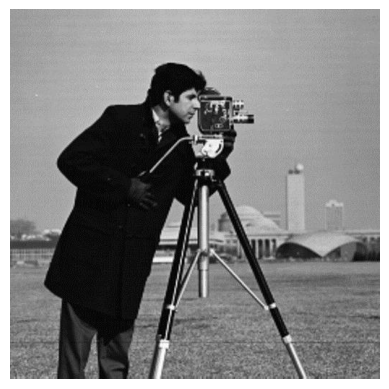

In [ ]:
import matplotlib.pyplot as plt

img = cv2.imread("CameraMan.jpg")        
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


###  Mean Filter (Averaging Filter)

The mean (average) filter smooths the image by replacing each pixel value with the average of its **k×k** neighborhood:

$
I'(x, y) = \frac{1}{k^2} \sum_{i=-\frac{k-1}{2}}^{\frac{k-1}{2}} 
            \sum_{j=-\frac{k-1}{2}}^{\frac{k-1}{2}} I(x+i, y+j)
$

 can also be expressed as a 2‑D convolution:

$
I'(x, y) = I(x, y) * h(x, y), \quad 
h(x, y) = \frac{1}{k^2}\mathbf{1}_{k\times k}
$

Larger **kernel sizes (k)** produce stronger smoothing and greater loss of detail.


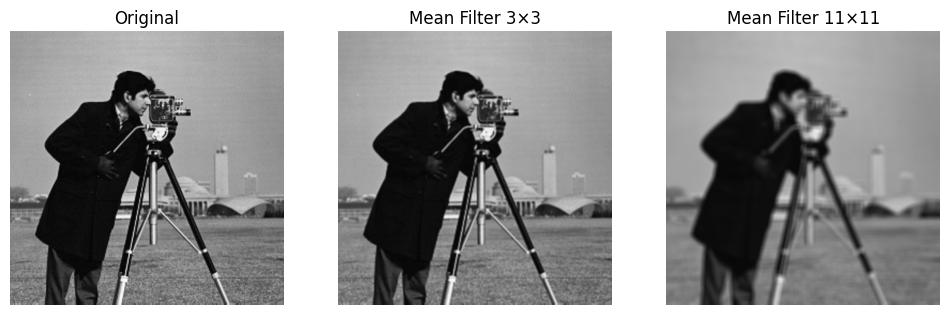

In [ ]:
blur1 = cv2.blur(img, (3, 3))  
blur2 = cv2.blur(img, (11, 11)) 

cv2.imwrite("CameraMan_blur3x3.png", blur1)
cv2.imwrite("CameraMan_blur11x11.png", blur2)

img_rgb    = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur1_rgb  = cv2.cvtColor(blur1, cv2.COLOR_BGR2RGB)
blur2_rgb  = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(blur1_rgb); plt.title("Mean Filter 3×3"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(blur2_rgb); plt.title("Mean Filter 11×11"); plt.axis('off')
plt.show()

The **Gaussian Filter** is a smoothing operator that reduces image noise and detail using the **2‑D Gaussian distribution** as a weighting function.  
Unlike the mean filter, which averages all neighboring pixels equally, the Gaussian filter assigns **higher weights to nearby pixels** and **lower weights to distant ones**.  
This leads to more natural blurring that preserves edges better.

Mathematically, the 2‑D Gaussian kernel is defined as:

$
G(x, y) = \frac{1}{2\pi\sigma^2}
          e^{-\frac{x^2 + y^2}{2\sigma^2}}
$

The filtered image is obtained by convolution:

$
I'(x, y) = I(x, y) * G(x, y)
$

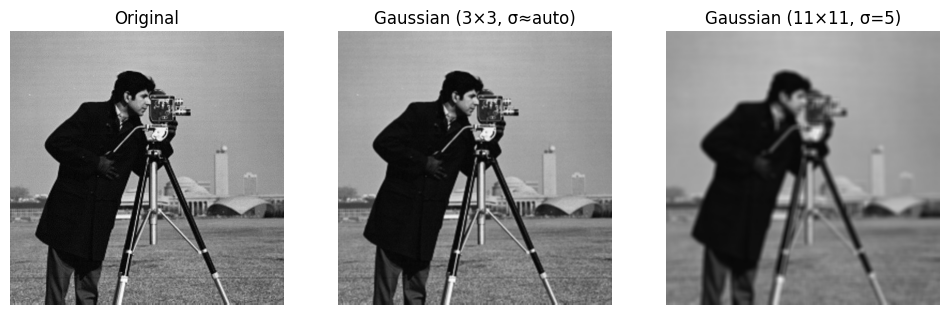

In [ ]:
gauss1 = cv2.GaussianBlur(img, (3, 3), 0)   
gauss2 = cv2.GaussianBlur(img, (11, 11), 5) 

cv2.imwrite("CameraMan_gauss3x3.png", gauss1)
cv2.imwrite("CameraMan_gauss11x11_sigma5.png", gauss2)

img_rgb     = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gauss1_rgb  = cv2.cvtColor(gauss1, cv2.COLOR_BGR2RGB)
gauss2_rgb  = cv2.cvtColor(gauss2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gauss1_rgb); plt.title("Gaussian (3×3, σ≈auto)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(gauss2_rgb); plt.title("Gaussian (11×11, σ=5)"); plt.axis('off')
plt.show()

##  Sharpening Filter (Unsharp Masking)

The **Unsharp Masking** filter enhances image sharpness by adding back the fine details that are lost during blurring.  
It works by first creating a blurred version of the original image, extracting the high‑frequency detail component, and then adding it back to the original image with a weighting factor \( \alpha \).

---

###  Mathematical Formulation

The steps for *Unsharp Masking* are as follows:

$
\begin{aligned}
1.\quad & \text{Blurred} = \text{GaussianBlur}(I) \\
2.\quad & \text{Detail} = I - \text{Blurred} \\
3.\quad & \text{Sharpened} = I + \alpha \times \text{Detail}
\end{aligned}
$

where:

- \( I \): original image  
- \( alpha \): sharpening gain (a scalar controlling detail amplification)

As the coefficient \( \alpha \) increases, edges become more pronounced and local contrast improves,  
but excessive values may also amplify **noise** and produce artifacts.

---

Key Insight:
This operation can also be interpreted as a **high‑boost filtering** process, where the high‑frequency components (edges and textures) are emphasized:

$
I' = (1 + \alpha)I - \alpha \cdot \text{GaussianBlur}(I)
$

---

also:

- \( alpha = 1.5 \) → Moderate sharpening (natural look)  
- \( alpha = 2.5 \) → Strong sharpening (high edge contrast, possible noise)




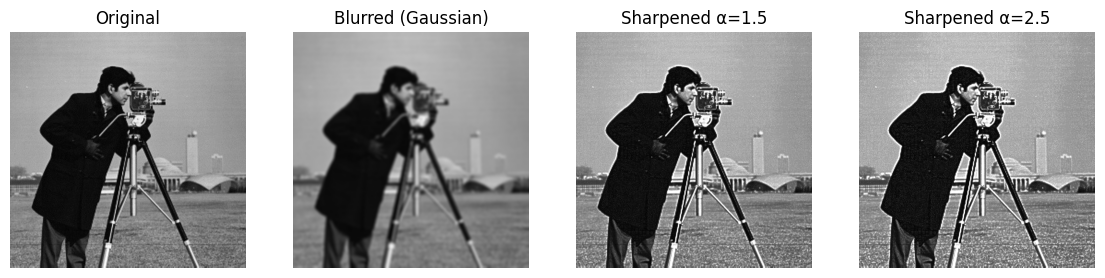

In [10]:
blurred = cv2.GaussianBlur(img, (11, 11), 3)

detail = cv2.subtract(img, blurred)

alpha1, alpha2 = 1.5, 2.5

sharpened_1 = cv2.addWeighted(img, 1.0, detail, alpha1, 0)
sharpened_2 = cv2.addWeighted(img, 1.0, detail, alpha2, 0)

cv2.imwrite("CameraMan_sharpened_alpha1.5.png", sharpened_1)
cv2.imwrite("CameraMan_sharpened_alpha2.5.png", sharpened_2)

img_rgb         = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurred_rgb     = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
sharp_rgb_1     = cv2.cvtColor(sharpened_1, cv2.COLOR_BGR2RGB)
sharp_rgb_2     = cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,5))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(blurred_rgb); plt.title("Blurred (Gaussian)"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(sharp_rgb_1); plt.title("Sharpened α=1.5"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(sharp_rgb_2); plt.title("Sharpened α=2.5"); plt.axis('off')
plt.show()